In [1]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

In [2]:
model_ori = YOLO("yolo11m.pt")

In [3]:
model_ft = YOLO("runs/detect/yolo11m1229/weights/best.pt")

In [7]:
def run_and_visualize_models(test_images_dir, model1, model2, num_images=4, seed=0):
    """
    随机选择指定数量的图片，使用两个YOLO模型进行检测，并可视化结果。
    
    参数：
        test_images_dir (str): 测试图片所在的目录路径。
        model1_path (str): 第一个YOLO模型的权重文件路径。
        model2_path (str): 第二个YOLO模型的权重文件路径。
        num_images (int): 需要检测和展示的图片数量。
    """
    
    # 获取测试图片列表
    all_images = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    # 设置随机种子
    random.seed(seed)
    # 随机选择指定数量的图片
    selected_images = random.sample(all_images, num_images)
    
    # 设置图像展示的布局
    fig, axes = plt.subplots(num_images, 2, figsize=(15, 5 * num_images))
    
    if num_images == 1:
        axes = [axes]  # 确保axes是列表形式
    
    for idx, image_name in enumerate(selected_images):
        image_path = os.path.join(test_images_dir, image_name)
        image = Image.open(image_path)
        
        # 使用第一个模型进行检测
        results1 = model1(image_path)
        annotated_image1 = results1[0].plot()
        
        # 使用第二个模型进行检测
        results2 = model2(image_path)
        annotated_image2 = results2[0].plot()
        
        # 可视化第一个模型的结果
        ax = axes[idx][0]
        ax.imshow(annotated_image1)
        ax.set_title(f'model 1 result: {image_name}')
        ax.axis('off')
        
        # 可视化第二个模型的结果
        ax = axes[idx][1]
        ax.imshow(annotated_image2)
        ax.set_title(f'model 2 result: {image_name}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [5]:
test_images_directory = "datasets/bdd100k_det/images/test"


image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/eedcaefb-76a4a256.jpg: 384x640 9 cars, 1 truck, 1 traffic light, 21.3ms
Speed: 7.7ms preprocess, 21.3ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/eedcaefb-76a4a256.jpg: 384x640 1 traffic sign, 12 cars, 2 trucks, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/d580b73f-53b69e1e.jpg: 384x640 1 person, 12 cars, 4 trucks, 22.5ms
Speed: 2.2ms preprocess, 22.5ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/d580b73f-53b69e1e.jpg: 384x640 2 traffic signs, 12 cars, 1 pedestrian, 2 trucks, 23.3ms
Speed: 3.2ms preprocess, 23.3ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/o

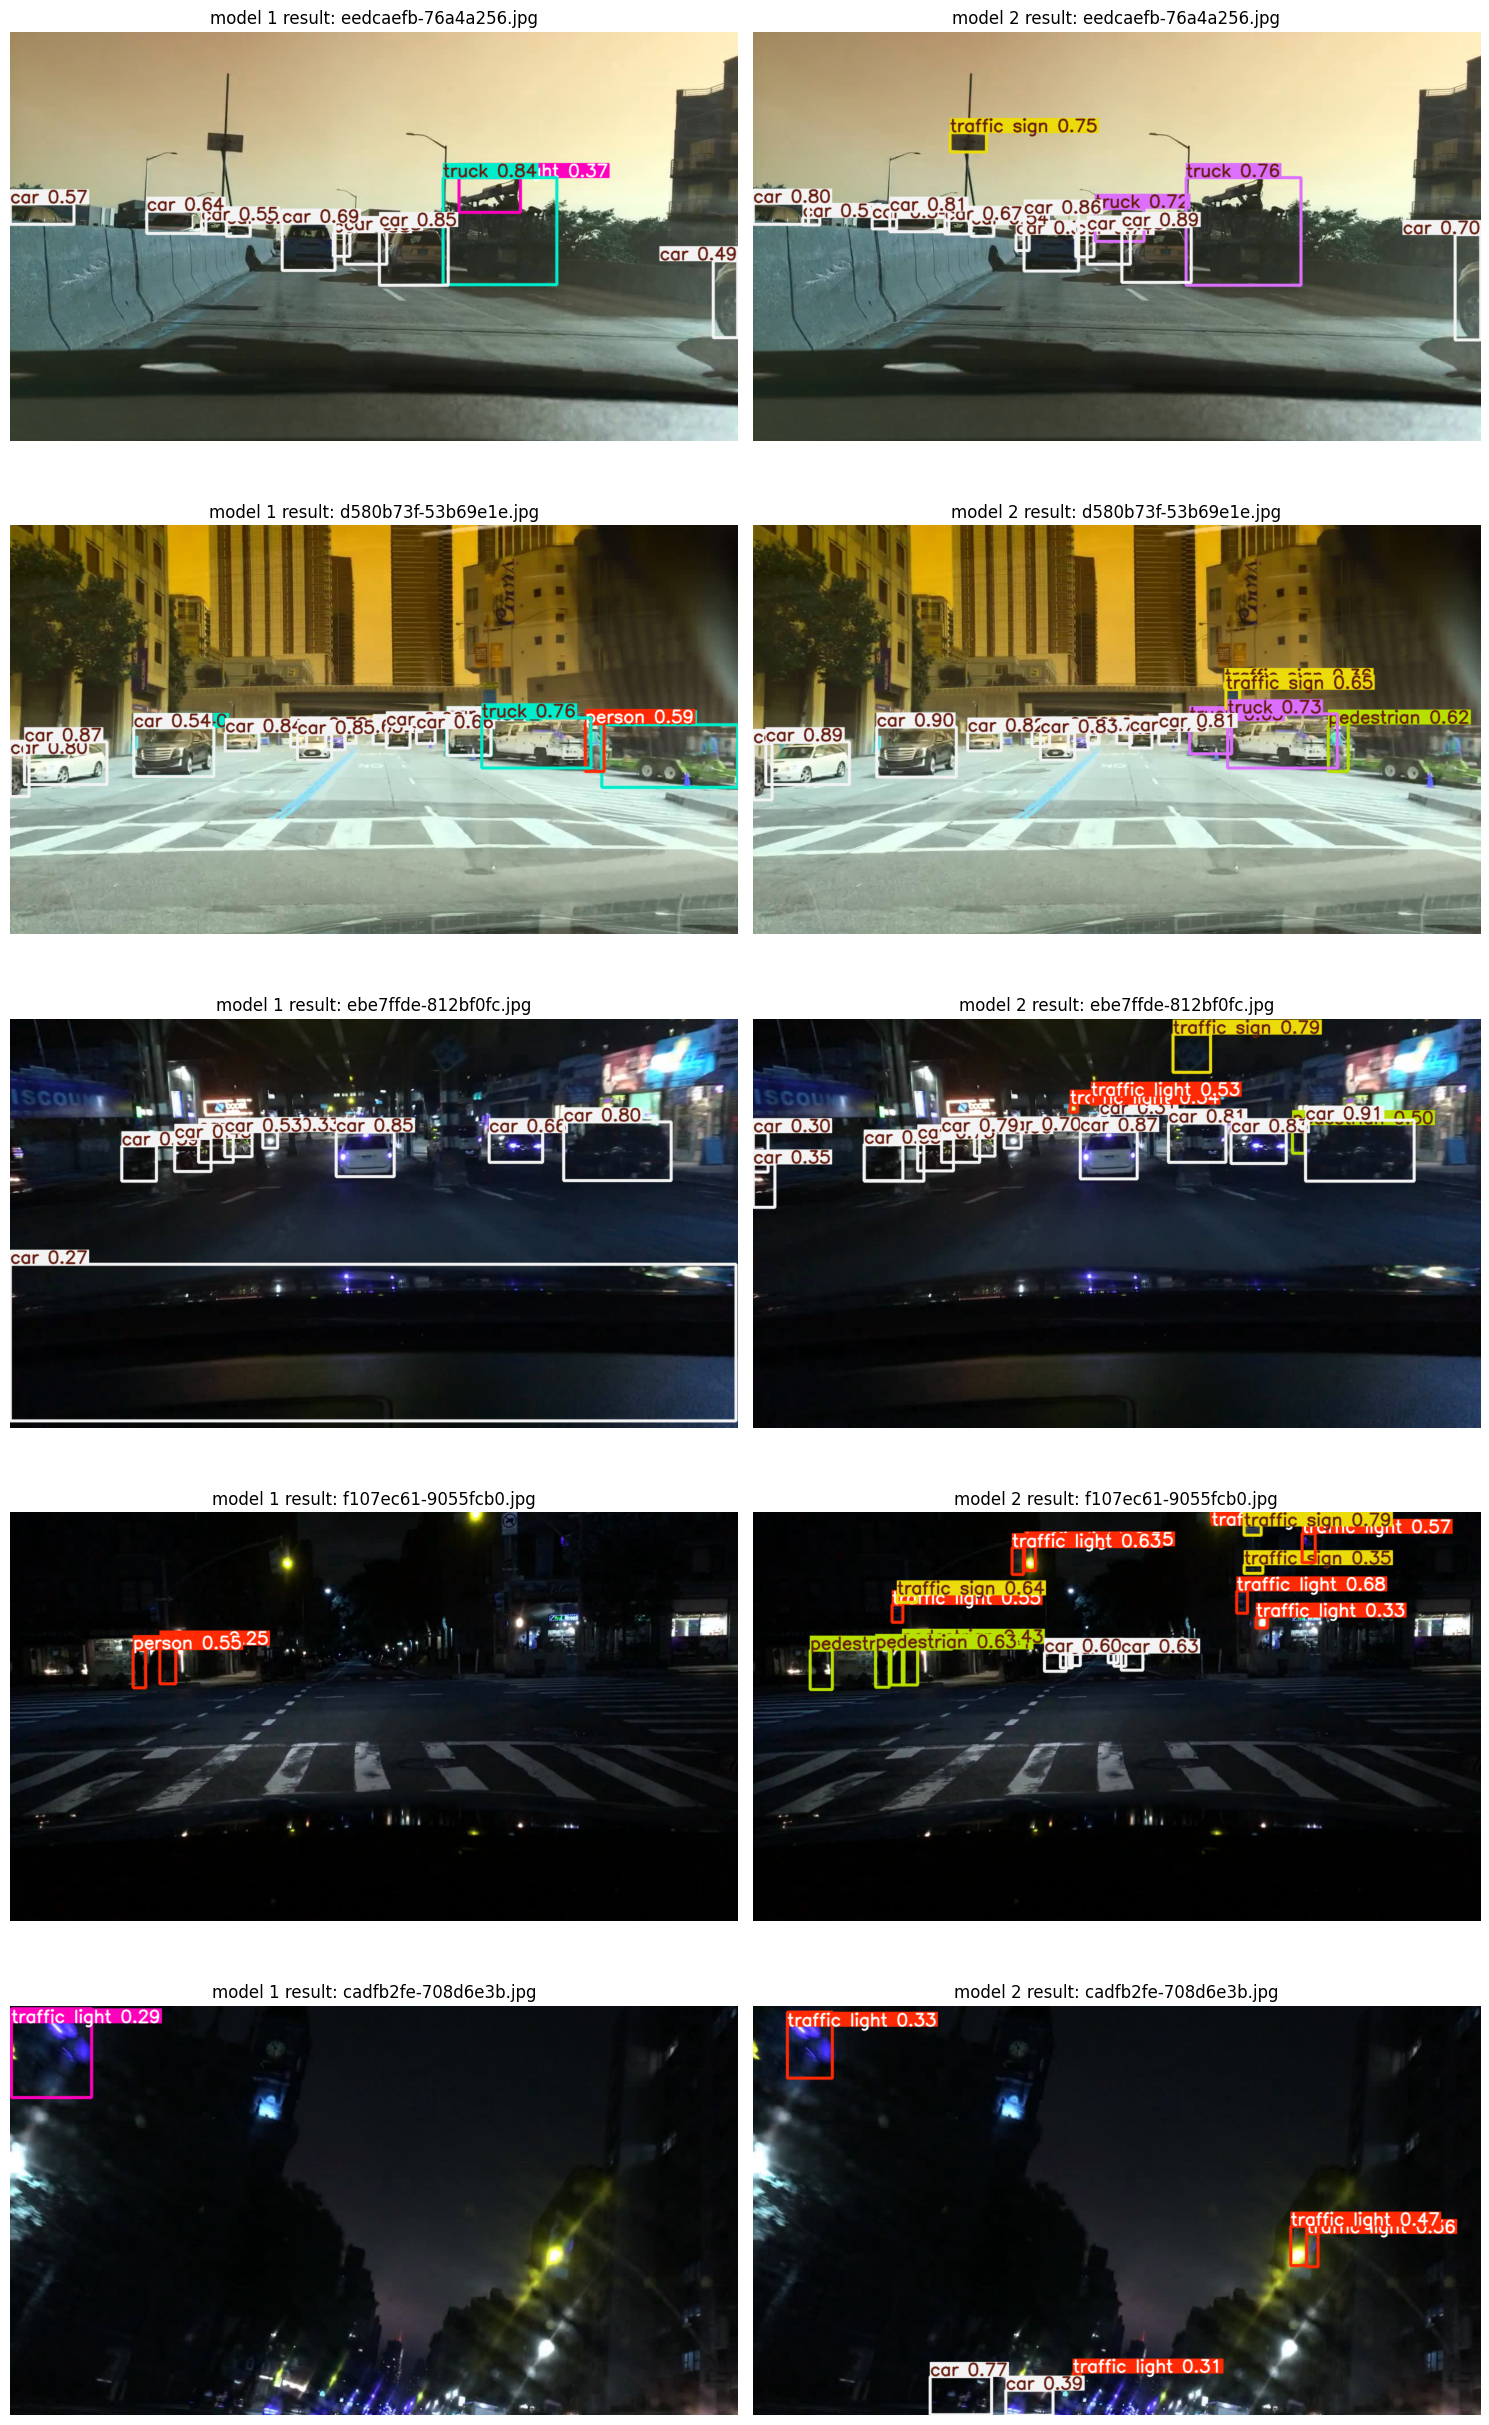

In [27]:
run_and_visualize_models(test_images_directory, model_ori, model_ft, num_images=5, seed=42)

In [10]:
def run_and_visualize_single_image(image_path, model1, model2):
    """
    指定一张图片路径，使用两个YOLO模型进行检测，并可视化对比结果。
    
    参数：
        image_path (str): 需要检测的图片路径。
        model1_path (str): 第一个YOLO模型的权重文件路径。
        model2_path (str): 第二个YOLO模型的权重文件路径。
    """

    # 检查图片是否存在
    if not os.path.exists(image_path):
        print(f"图片路径不存在: {image_path}")
        return
    
    # 使用第一个模型进行检测
    results1 = model1(image_path)
    annotated_image1 = results1[0].plot()
    
    # 使用第二个模型进行检测
    results2 = model2(image_path)
    annotated_image2 = results2[0].plot()
    
    # 设置图像展示的布局
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # 可视化第一个模型的结果
    ax = axes[0]
    ax.imshow(annotated_image1)
    ax.set_title('model 1 result')
    ax.axis('off')
    
    # 可视化第二个模型的结果
    ax = axes[1]
    ax.imshow(annotated_image2)
    ax.set_title('model 2 result')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()


image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/fdb05876-a567f222.jpg: 384x640 2 persons, 4 cars, 1 bus, 4 traffic lights, 2 backpacks, 20.4ms
Speed: 9.9ms preprocess, 20.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/fdb05876-a567f222.jpg: 384x640 5 traffic lights, 4 traffic signs, 5 cars, 2 pedestrians, 1 bus, 27.1ms
Speed: 2.6ms preprocess, 27.1ms inference, 11.6ms postprocess per image at shape (1, 3, 384, 640)


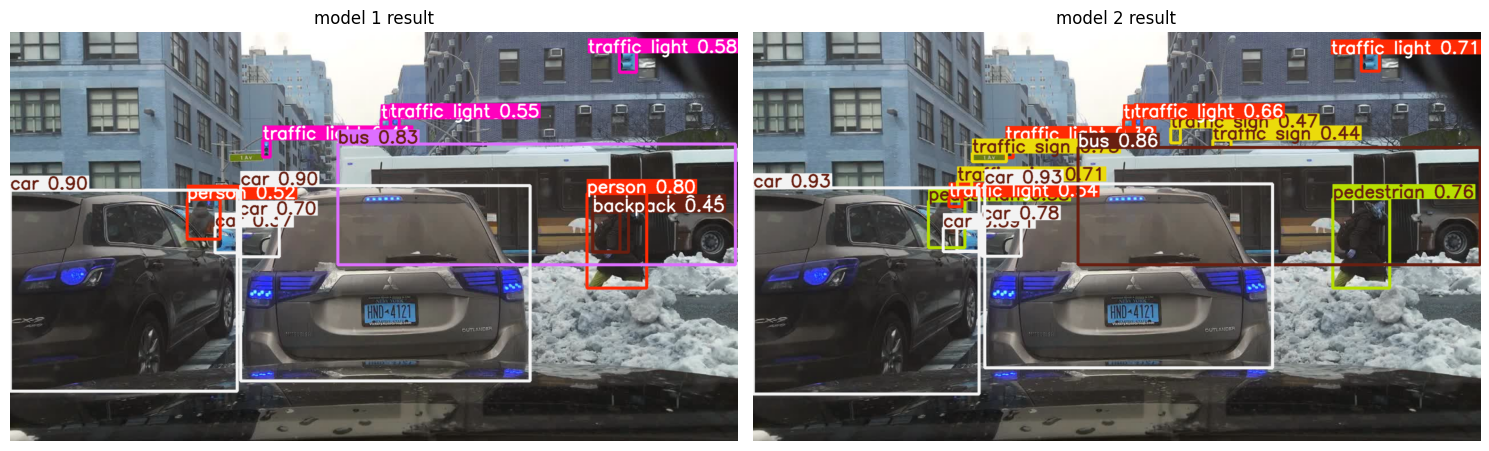

In [13]:
run_and_visualize_single_image("datasets/bdd100k_det/images/test/fdb05876-a567f222.jpg", model_ori, model_ft)


image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/fdb23892-929ab524.jpg: 384x640 2 cars, 2 buss, 1 truck, 2 traffic lights, 19.0ms
Speed: 11.0ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/fdb23892-929ab524.jpg: 384x640 2 traffic lights, 2 traffic signs, 4 cars, 19.7ms
Speed: 3.6ms preprocess, 19.7ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)


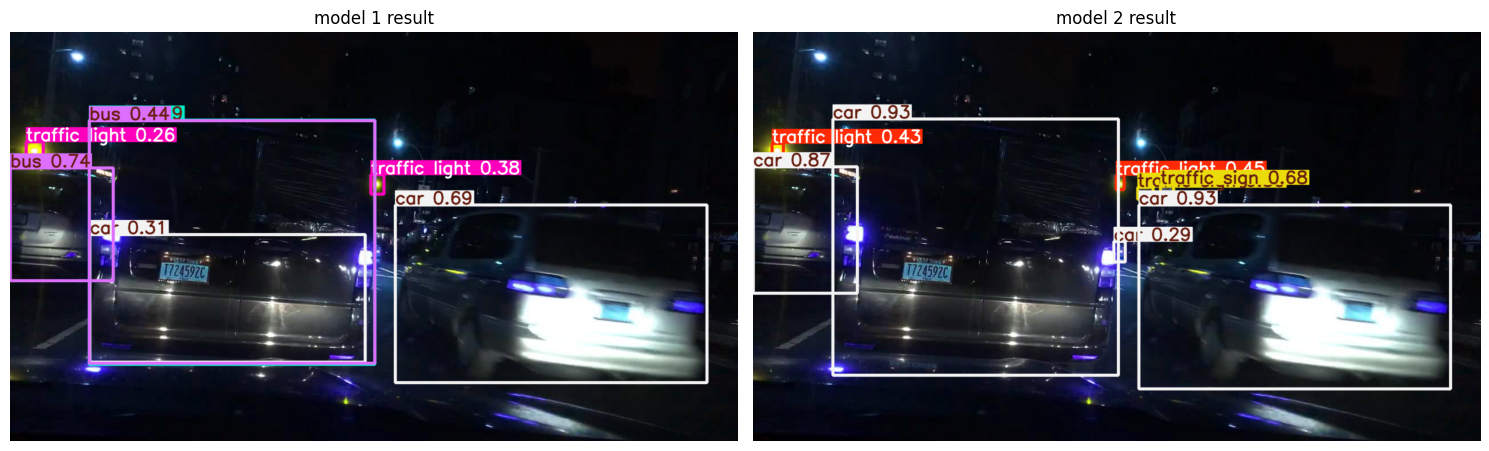

In [14]:
run_and_visualize_single_image("datasets/bdd100k_det/images/test/fdb23892-929ab524.jpg", model_ori, model_ft)


image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/fdb12c04-e28a8c0c.jpg: 384x640 2 persons, 2 cars, 1 bus, 19.9ms
Speed: 6.5ms preprocess, 19.9ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/fdb12c04-e28a8c0c.jpg: 384x640 1 traffic sign, 4 cars, 3 pedestrians, 1 bus, 18.7ms
Speed: 3.0ms preprocess, 18.7ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


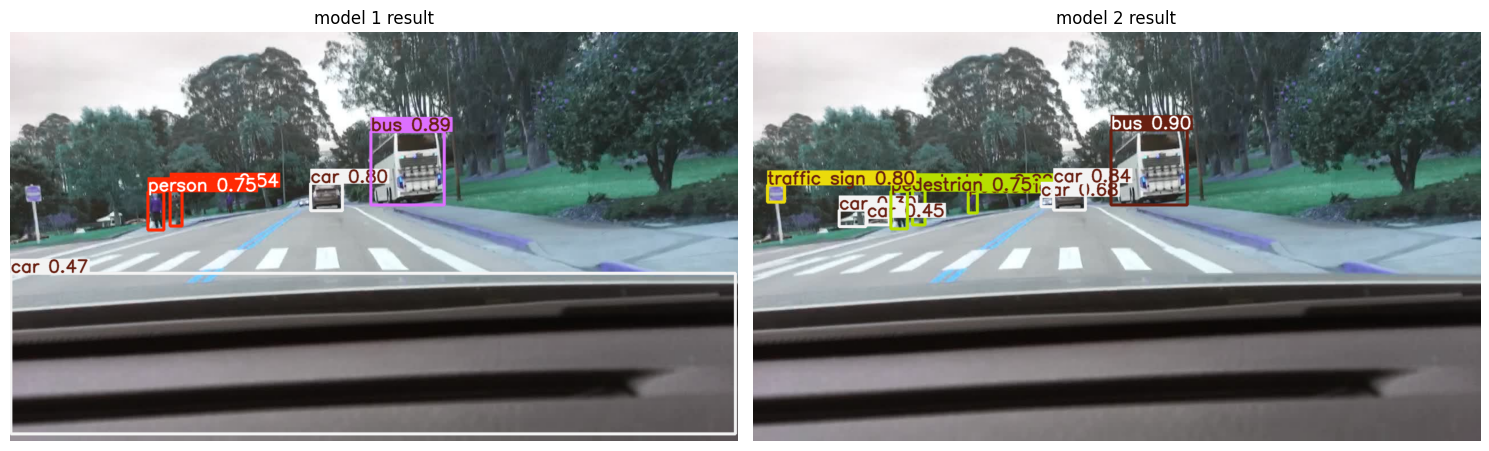

In [15]:
run_and_visualize_single_image("datasets/bdd100k_det/images/test/fdb12c04-e28a8c0c.jpg", model_ori, model_ft)


image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/cabc30fc-fd79926f.jpg: 384x640 4 persons, 4 cars, 1 motorcycle, 1 truck, 23.1ms
Speed: 7.6ms preprocess, 23.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/bdd100k_det/images/test/cabc30fc-fd79926f.jpg: 384x640 4 cars, 4 pedestrians, 1 truck, 1 rider, 1 bicycle, 1 motorcycle, 35.9ms
Speed: 3.0ms preprocess, 35.9ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


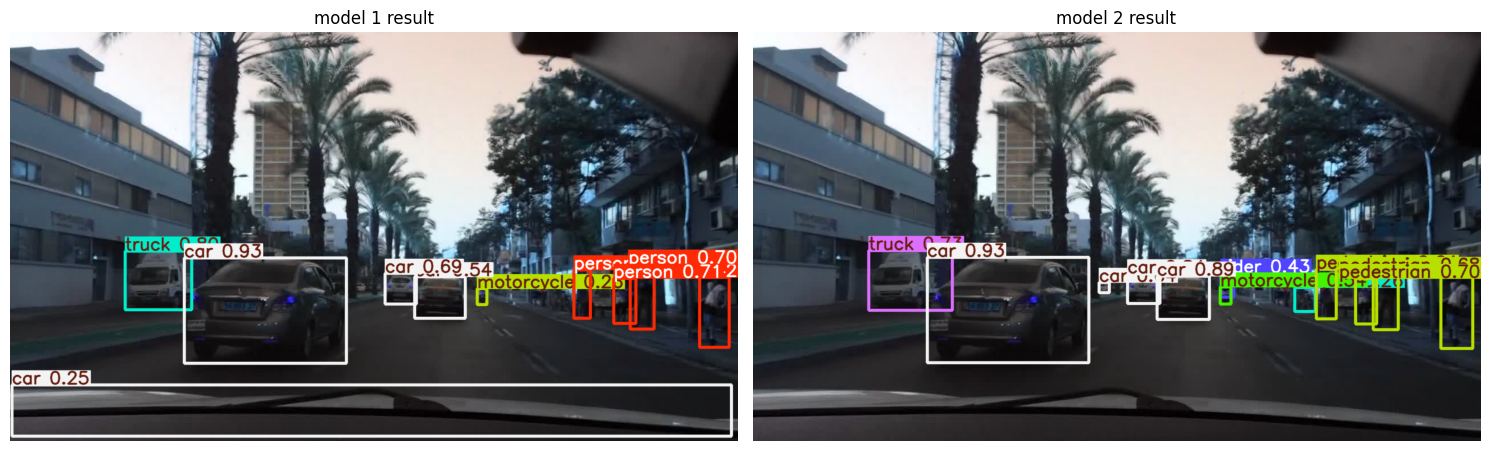

In [17]:
run_and_visualize_single_image("datasets/bdd100k_det/images/test/cabc30fc-fd79926f.jpg", model_ori, model_ft)


image 1/1 /ssd2/oversea_data/detection/datasets/example_images/白天雾3.jpeg: 320x640 5 cars, 77.7ms
Speed: 6.8ms preprocess, 77.7ms inference, 11.5ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /ssd2/oversea_data/detection/datasets/example_images/白天雾3.jpeg: 320x640 5 traffic signs, 10 cars, 1 pedestrian, 30.9ms
Speed: 3.8ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 640)


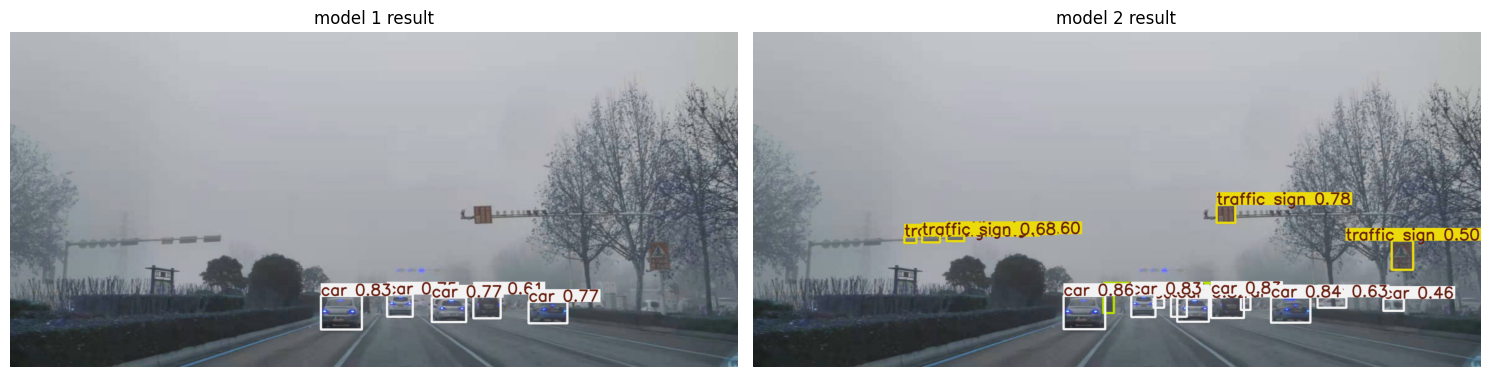

In [25]:
run_and_visualize_single_image("datasets/example_images/白天雾3.jpeg", model_ori, model_ft)